In [29]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df['target'] = cancer_data['target']

X = df[cancer_data.feature_names].values
y = df['target'].values
print('data dimensions', X.shape)

data dimensions (569, 30)


# Random Forest with Sklearn

In [30]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df['target'] = cancer_data['target']

X = df[cancer_data.feature_names].values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

first_row = X_test[0]
print("prediction:", rf.predict([first_row]))
print("true value:", y_test[0])

prediction: [1]
true value: 1


In [31]:


print("random forest accuracy:", rf.score(X_test, y_test))

random forest accuracy: 0.965034965034965


In [32]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print("decision tree accuracy:", dt.score(X_test, y_test))

decision tree accuracy: 0.916083916083916


## Grid search Rand Forest Model

In [33]:

from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [10, 25, 50, 75, 100],
}

rf = RandomForestClassifier(random_state=123)
gs = GridSearchCV(rf, param_grid, scoring='f1', cv=5)
gs.fit(X, y)
print("best params:", gs.best_params_)

best params: {'n_estimators': 25}


## Elbow Graph
to find the sweet spot. Elbow Graph is a model that optimizes performance without adding unnecessary complexity.

In [34]:
n_estimators = list(range(1, 101))
param_grid = {
    'n_estimators': n_estimators,
}
rf = RandomForestClassifier(random_state=123)
gs = GridSearchCV(rf, param_grid, cv=5)
gs.fit(X, y)
print("best params:", gs.best_params_)

best params: {'n_estimators': 30}


In [35]:
scores = gs.cv_results_['mean_test_score']
# print(scores)

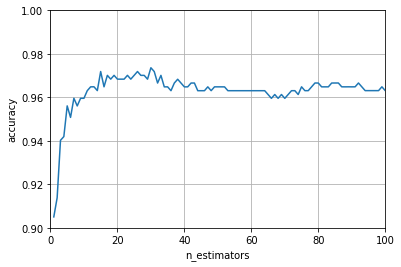

In [36]:
import matplotlib.pyplot as plt
scores = gs.cv_results_['mean_test_score']
plt.plot(n_estimators, scores)
plt.xlabel("n_estimators")
plt.ylabel('accuracy')
plt.xlim(0,100)
plt.ylim(0.9,1)
plt.grid(b='Ture')
plt.show()


# import matplotlib.pyplot as plt

# scores = gs.cv_results_['mean_test_score']
# plt.plot(n_estimators, scores)
# plt.xlabel("n_estimators")
# plt.ylabel("accuracy")
# plt.xlim(0, 100)
# plt.ylim(0.9, 1)
# plt.show()

In [49]:
import numpy as np

test = gs.cv_results_['mean_test_score']

temp = np.argpartition(-test, 10)
result_args = temp[:4]

temp = np.partition(-test, 10)
result = -temp[:15]
print(result)

[0.9719143  0.9719143  0.97189877 0.97365316 0.97015991 0.97015991
 0.97015991 0.97015991 0.97014439 0.97014439 0.97014439 0.96840553
 0.96840553 0.96840553 0.96840553]


In [50]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X, y) 
print("best params:", gs.best_params_)

best params: {'n_estimators': 30}
